In [3]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8") # principlamente para mostrar tildes en las gráficas

library(MASS)
library(ISLR)
library(dplyr)
library(glmnet)
library(caret)
library(ggplot2)
library(gridExtra) # varios plots en misma figura

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"


Adjuntando el paquete: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Cargando paquete requerido: Matrix

Loaded glmnet 4.1-8

Cargando paquete requerido: ggplot2

Cargando paquete requerido: lattice


Adjuntando el paquete: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Regresión

Preparamos los datos

In [97]:
data("Hitters")
hitters_clean <- na.omit(Hitters) %>% select(-League, -Division, -NewLeague)
#set.seed(123)
#train_index <- createDataPartition(hitters_clean$Salary, p = 0.8, list = FALSE)
#train <- hitters_clean[train_index,]
#test <- hitters_clean[-train_index,]

train <- hitters_clean[1:200,]
test <- hitters_clean[(200 + 1):nrow(hitters_clean), ]

## Regresión lineal

### Regresión lineal simple

In [98]:
simple_model <- lm(Salary ~ Hits, data = train) # para ajustar un modelo con mas predictores Hits + CHits

print("Intervalos de confianza al 95%:")
confint(simple_model, level = 0.95) # intervalos de confianza

summary(simple_model)

[1] "Intervalos de confianza al 95%:"


,2.5 %,97.5 %
(Intercept),-144.342027,160.732256
Hits,3.798535,6.455949



Call:
lm(formula = Salary ~ Hits, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-786.57 -234.07  -66.17  149.62 2114.01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.1951    77.3508   0.106    0.916    
Hits          5.1272     0.6738   7.610 1.09e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 418.4 on 198 degrees of freedom
Multiple R-squared:  0.2263,	Adjusted R-squared:  0.2224 
F-statistic: 57.91 on 1 and 198 DF,  p-value: 1.092e-12


**Predicciones**

In [119]:
train_pred_simple <- predict(simple_model)
test_pred_simple <- predict(simple_model, newdata = test)

**Gráfico**

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


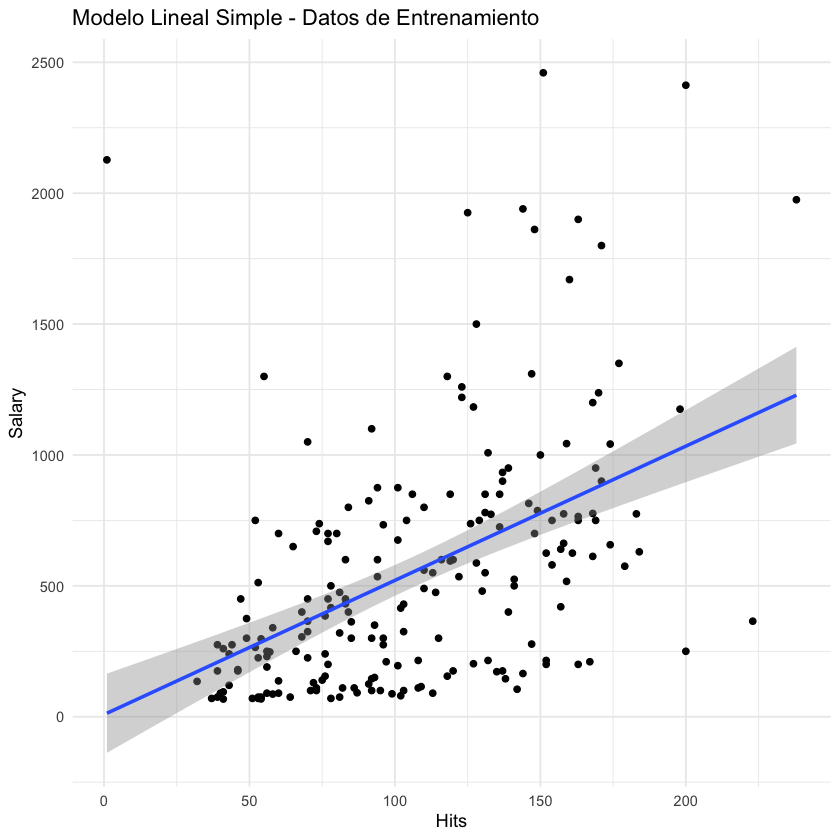

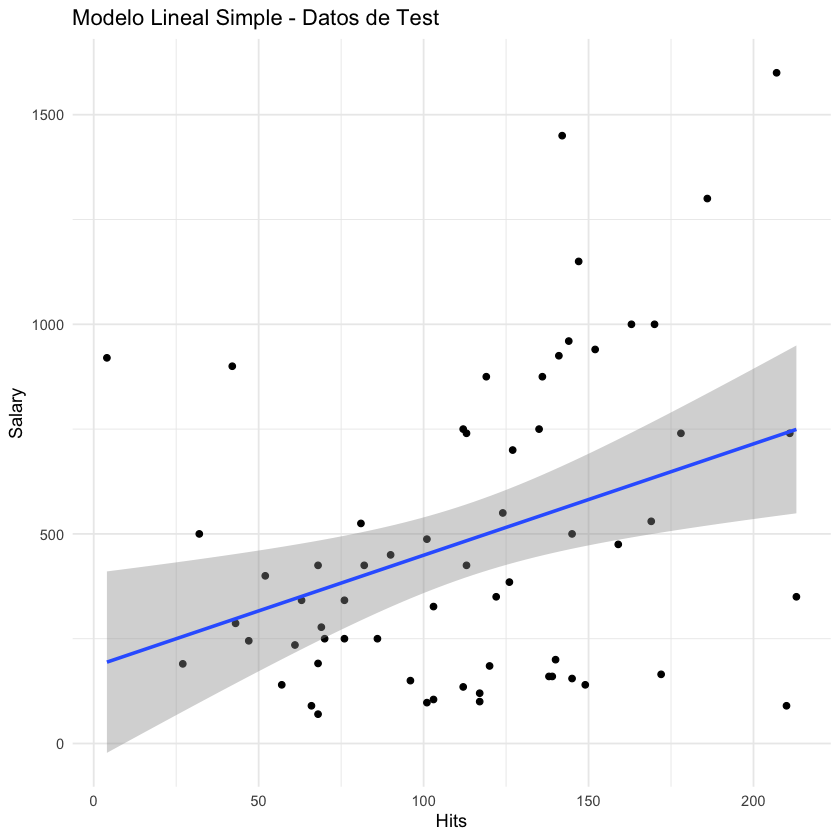

In [100]:
ggplot(train, aes(x = Hits, y = Salary)) + geom_point() + geom_smooth(method = "lm", se = TRUE) + 
labs(title = "Modelo Lineal Simple - Datos de Entrenamiento") + theme_minimal()

ggplot(test, aes(x = Hits, y = Salary)) + geom_point() + geom_smooth(method = "lm", se = TRUE) + 
labs(title = "Modelo Lineal Simple - Datos de Test") + theme_minimal()

### Modelo multilineal

In [101]:
multi_model <- lm(Salary ~ ., data = train)

confint(multi_model, level = 0.95) # intervalos de confianza

summary(multi_model)

,2.5 %,97.5 %
(Intercept),-81.5240989,294.5838143
AtBat,-4.6119085,-1.4036256
Hits,4.8508976,16.2562990
HmRun,-16.4897463,11.6874473
Runs,-8.6412674,5.3813735
RBI,-5.7408796,6.1344099
Walks,2.2953035,10.5488310
Years,-25.5674110,28.4985645
CAtBat,-0.4574467,0.1377415
CHits,-1.8633315,1.1109960



Call:
lm(formula = Salary ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-724.32 -176.70  -42.04  125.87 1908.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 106.52986   95.31314   1.118 0.265168    
AtBat        -3.00777    0.81304  -3.699 0.000286 ***
Hits         10.55360    2.89035   3.651 0.000340 ***
HmRun        -2.40115    7.14065  -0.336 0.737057    
Runs         -1.62995    3.55361  -0.459 0.647013    
RBI           0.19677    3.00943   0.065 0.947941    
Walks         6.42207    2.09161   3.070 0.002463 ** 
Years         1.46558   13.70138   0.107 0.914933    
CAtBat       -0.15985    0.15083  -1.060 0.290631    
CHits        -0.37617    0.75375  -0.499 0.618337    
CHmRun        0.29513    1.84025   0.160 0.872762    
CRuns         2.10611    0.85595   2.461 0.014800 *  
CRBI          1.00458    0.77352   1.299 0.195676    
CWalks       -0.87361    0.37143  -2.352 0.019735 *  
PutOuts       0.42170    0.09867   

**Predicciones**

In [122]:
train_pred_multi <- predict(multi_model)
test_pred_multi <- predict(multi_model, newdata = test)

**Gráfica**

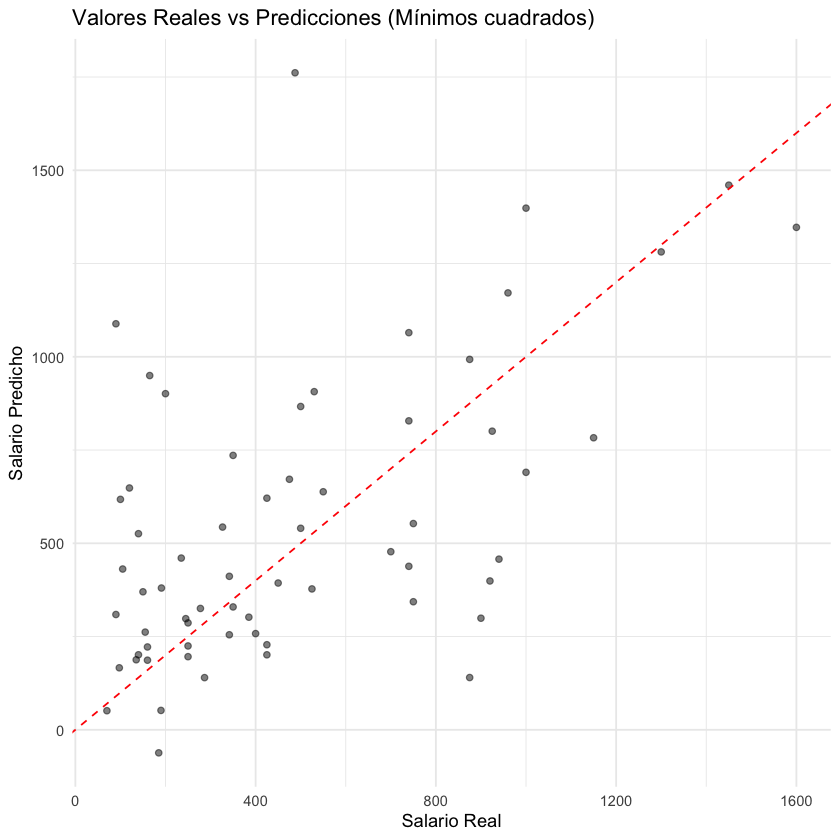

In [104]:
plotLSS <- ggplot(data = data.frame(real = test$Salary, pred = test_pred_multi), aes(x = real, y = pred)) +
           geom_point(alpha = 0.5) +
           geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
           labs(title = "Valores Reales vs Predicciones (Mínimos cuadrados)",
                x = "Salario Real",
                y = "Salario Predicho") +
           theme_minimal()

plotLSS

## Regresión Ridge

In [105]:
x_train <- train %>% select(-Salary)
y_train <- train$Salary
x_test <- test %>% select(-Salary)
y_test <- test$Salary

Ajuste

In [114]:
lam = seq(0, 10, by = 0.01)

# validacion cruzada de k-iteraciones (por defecto k = 10)
ridge_model <- cv.glmnet(as.matrix(x_train), y_train, alpha = 0, lambda = lam)
ridge_model$lambda.min
#plot(ridge_model)

[1] 5.12

In [124]:
predicciones_rg_train <- predict(ridge_model, newx = as.matrix(x_train), type = "response", s = ridge_model$lambda.min)
predicciones_rg <- predict(ridge_model, newx = as.matrix(x_test), type = "response", s = ridge_model$lambda.min)

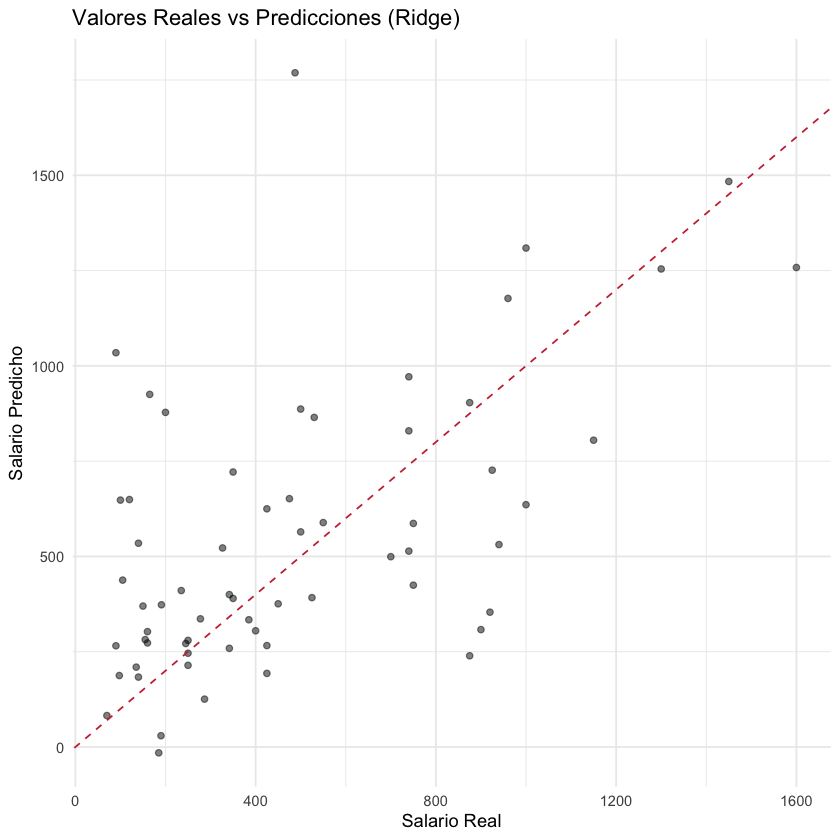

In [109]:
plotRidge <- ggplot(data = data.frame(real = test$Salary, pred = as.vector(predicciones_rg)), aes(x = real, y = pred)) +
             geom_point(alpha = 0.5) +
             geom_abline(intercept = 0, slope = 1, color = "#ca3142", linetype = "dashed") +
             labs(title = "Valores Reales vs Predicciones (Ridge)",
                  x = "Salario Real",
                  y = "Salario Predicho") +
             theme_minimal()

plotRidge

## Regressión LASSO

In [159]:
lam = seq(0, 10, by = 0.01)

# validacion cruzada de k-iteraciones (por defecto k = 10)
lasso_model <- cv.glmnet(as.matrix(x_train), y_train, alpha = 1, lambda = lam)
lasso_model$lambda.min

[1] 0.78

**Selección de parámetros**

Veamos cuales nos elimina LASSO

In [163]:
coef(lasso_model, s = "lambda.min")

17 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept) 94.2895254
AtBat       -2.7691691
Hits         9.3287573
HmRun       -3.5945865
Runs         .        
RBI          0.2891252
Walks        5.7325202
Years       -0.3083247
CAtBat      -0.1578741
CHits        .        
CHmRun       1.2704613
CRuns        1.4466384
CRBI         0.5850552
CWalks      -0.6927373
PutOuts      0.4118160
Assists      0.6188466
Errors      -4.1449658

In [125]:
predicciones_la_train <- predict(lasso_model, newx = as.matrix(x_train), type = "response", s = lasso_model$lambda.min)
predicciones_la <- predict(lasso_model, newx = as.matrix(x_test), type = "response", s = lasso_model$lambda.min)

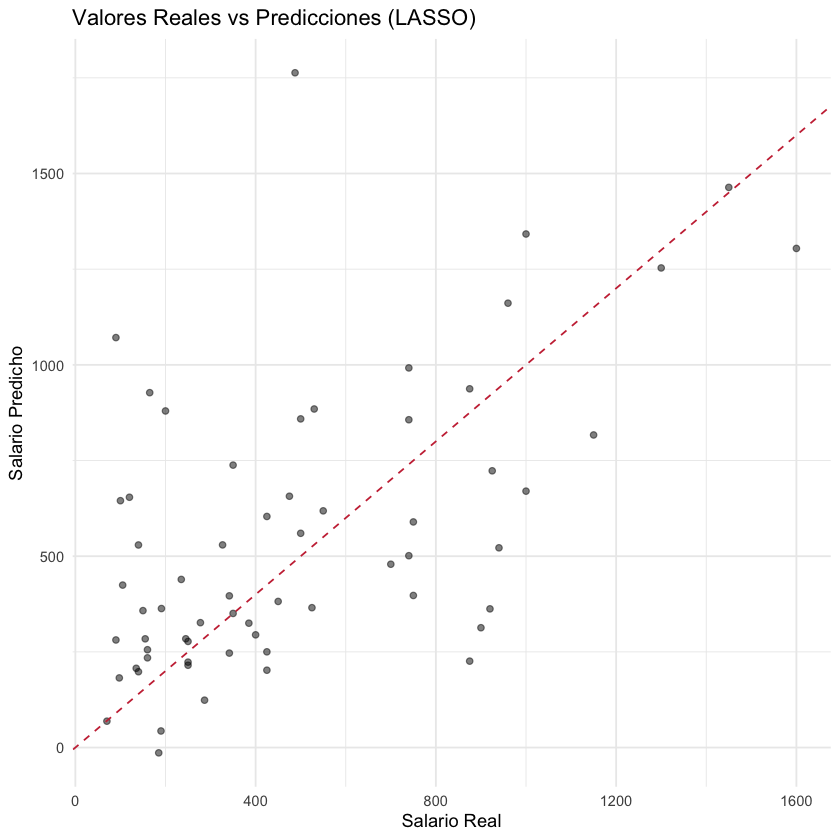

In [126]:
plotLASSO <- ggplot(data = data.frame(real = test$Salary, pred = as.vector(predicciones_la)), aes(x = real, y = pred)) +
             geom_point(alpha = 0.5) +
             geom_abline(intercept = 0, slope = 1, color = "#ca3142", linetype = "dashed") +
             labs(title = "Valores Reales vs Predicciones (LASSO)",
                  x = "Salario Real",
                  y = "Salario Predicho") +
             theme_minimal()

plotLASSO

In [ ]:
stats <- function(y, y_pred, fact = 2) {
    rse <- sqrt(sum((y - y_pred)**2) / (length(y) - fact))
    cat("RSE:", rse, "\n")

    r2 <- 1 - (sum((y - y_pred)^2) / sum((y - mean(y))^2))
    cat("R2:", r2, "\n")
}

     Model Train_RSE Train_MSE Train_RMSE  Train_R2 Test_RSE Test_MSE Test_RMSE
1   Simple  418.4460 173346.07   416.3485 0.2262813 380.8775 140462.3  374.7830
2 Multiple  318.0044  92531.03   304.1891 0.5869938 415.8548 126270.1  355.3451
3    Ridge  322.6702  95266.17   308.6522 0.5747857 399.3690 116457.1  341.2581
4    Lasso  319.6337  93481.63   305.7477 0.5827509 404.1768 119277.9  345.3663
      Test_R2
1 -0.06696709
2  0.04083828
3  0.11537917
4  0.09395203


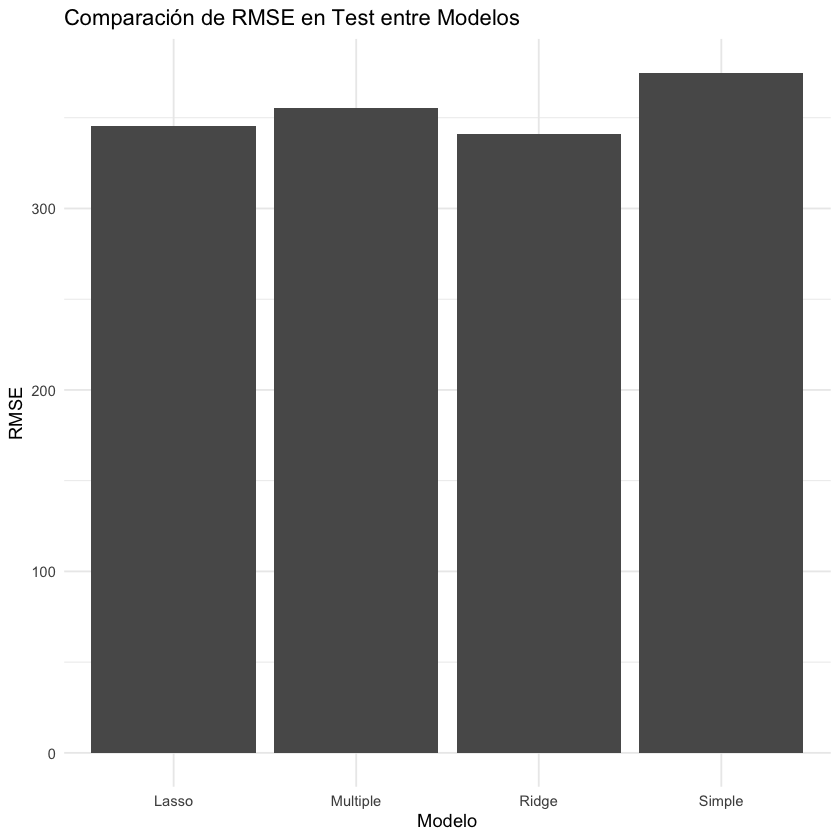

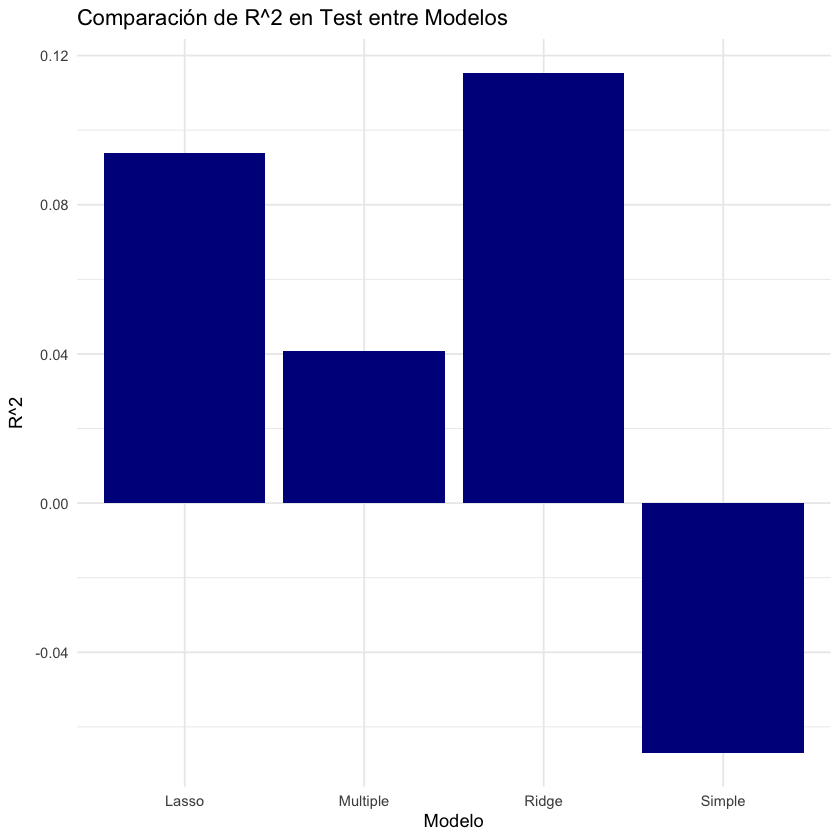

In [150]:
# Métricas de comparación
models_comparison <- data.frame(
  Model = c("Simple", "Multiple", "Ridge", "Lasso"),
  Train_RSE = c(
    sqrt(sum((train_pred_simple - train$Salary)**2) / (length(train$Salary) - 2)), # n-p-1
    sqrt(sum((train_pred_multi - train$Salary)**2) / (length(train$Salary) - ncol(x_train) - 1)),
    sqrt(sum((predicciones_rg_train - y_train)**2) / (length(y_train) - ncol(x_train) - 1)), 
    sqrt(sum((predicciones_la_train - y_train)**2) / (length(y_train) - ncol(x_train) - 1))
  ),
  Train_MSE = c(
    mean((train_pred_simple - train$Salary)^2),
    mean((train_pred_multi - train$Salary)^2),
    mean((predicciones_rg_train - y_train)^2),
    mean((predicciones_la_train - y_train)^2)
  ),
  Train_RMSE = c(
    sqrt(mean((train_pred_simple - train$Salary)^2)),
    sqrt(mean((train_pred_multi - train$Salary)^2)),
    sqrt(mean((predicciones_rg_train - y_train)^2)),
    sqrt(mean((predicciones_la_train - y_train)^2))
  ),
  Train_R2 = c(
    1 - (sum((train$Salary - train_pred_simple)^2) / sum((train$Salary - mean(train$Salary))^2)),
    1 - (sum((train$Salary - train_pred_multi)^2) / sum((train$Salary - mean(train$Salary))^2)), 
    1 - (sum((y_train - predicciones_rg_train)^2) / sum((y_train - mean(y_train))^2)), 
    1 - (sum((y_train - predicciones_la_train)^2) / sum((y_train - mean(y_train))^2))
  ),
  Test_RSE = c(
    sqrt(sum((test_pred_simple - test$Salary)**2) / (length(test$Salary) - 2)), # n-p-1
    sqrt(sum((test_pred_multi - test$Salary)**2) / (length(test$Salary) - ncol(x_test) - 1)),
    sqrt(sum((predicciones_rg - y_test)**2) / (length(y_test) - ncol(x_test) - 1)), 
    sqrt(sum((predicciones_la - y_test)**2) / (length(y_test) - ncol(x_test) - 1))
  ),
  Test_MSE = c(
    mean((test_pred_simple - test$Salary)^2),
    mean((test_pred_multi - test$Salary)^2),
    mean((predicciones_rg - y_test)^2),
    mean((predicciones_la - y_test)^2)
  ),
  Test_RMSE = c(
    sqrt(mean((test_pred_simple - test$Salary)^2)),
    sqrt(mean((test_pred_multi - test$Salary)^2)),
    sqrt(mean((predicciones_rg - y_test)^2)),
    sqrt(mean((predicciones_la - y_test)^2))
  ),
  Test_R2 = c(
    1 - (sum((test$Salary - test_pred_simple)^2) / sum((test$Salary - mean(test$Salary))^2)),
    1 - (sum((test$Salary - test_pred_multi)^2) / sum((test$Salary - mean(test$Salary))^2)), 
    1 - (sum((y_test - predicciones_rg)^2) / sum((y_test - mean(y_test))^2)), 
    1 - (sum((y_test - predicciones_la)^2) / sum((y_test - mean(y_test))^2))
  )
)

print(models_comparison)

# Visualización final comparativa
plot_rmse <- ggplot(models_comparison, aes(x = Model, y = Test_RMSE)) +
             geom_bar(stat = "identity") +
             labs(title = "Comparación de RMSE en Test entre Modelos",
                  y = "RMSE",
                  x = "Modelo") + theme_minimal()

plot_r2 <- ggplot(models_comparison) +
    geom_bar(aes(x = Model, y = Test_R2), stat = "identity", fill = "darkblue") +
    labs(title = "Comparación de R^2 en Test entre Modelos",
         y = "R^2",
         x = "Modelo") +
    theme_minimal()

plot_rmse
plot_r2

## PCA

In [151]:
help(Hitters)

Hitters                  package:ISLR                  R Documentation

_B_a_s_e_b_a_l_l _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Major League Baseball Data from the 1986 and 1987 seasons.

_U_s_a_g_e:

     Hitters
     
_F_o_r_m_a_t:

     A data frame with 322 observations of major league players on the
     following 20 variables.

     ‘AtBat’ Number of times at bat in 1986

     ‘Hits’ Number of hits in 1986

     ‘HmRun’ Number of home runs in 1986

     ‘Runs’ Number of runs in 1986

     ‘RBI’ Number of runs batted in in 1986

     ‘Walks’ Number of walks in 1986

     ‘Years’ Number of years in the major leagues

     ‘CAtBat’ Number of times at bat during his career

     ‘CHits’ Number of hits during his career

     ‘CHmRun’ Number of home runs during his career

     ‘CRuns’ Number of runs during his career

     ‘CRBI’ Number of runs batted in during his career

     ‘CWalks’ Number of walks during his career

     ‘League’ A factor with 

In [152]:
pca_hitters_muestral <- princomp(hitters_clean, cor=TRUE)
summary(pca_hitters_muestral)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.7733967 2.0302601 1.3148557 0.9575410 0.84109683
Proportion of Variance 0.4524547 0.2424680 0.1016968 0.0539344 0.04161435
Cumulative Proportion  0.4524547 0.6949227 0.7966195 0.8505539 0.89216822
                           Comp.6     Comp.7     Comp.8     Comp.9     Comp.10
Standard deviation     0.72374220 0.69841796 0.50090065 0.42525940 0.363901982
Proportion of Variance 0.03081193 0.02869339 0.01475891 0.01063797 0.007789685
Cumulative Proportion  0.92298014 0.95167354 0.96643244 0.97707042 0.984860104
                           Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.312011679 0.243641510 0.232044829 0.163510472
Proportion of Variance 0.005726546 0.003491834 0.003167341 0.001572687
Cumulative Proportion  0.990586651 0.994078485 0.997245826 0.998818513
                            Comp.15      Comp.16      Comp.17
Standard deviati

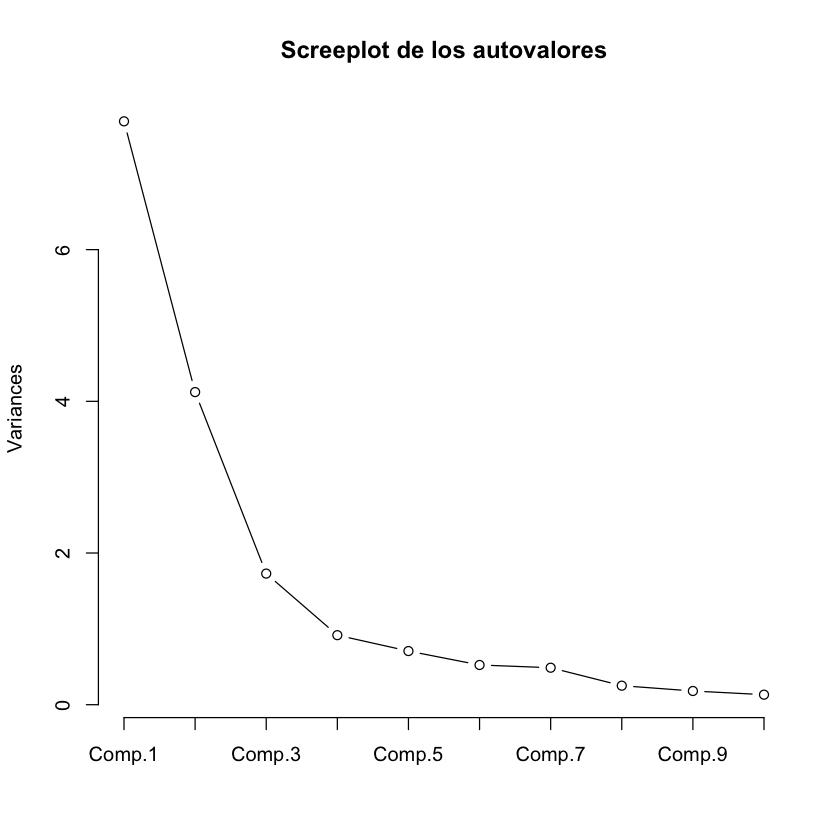

In [153]:
screeplot(pca_hitters_muestral, type = "lines", main="Screeplot de los autovalores")

# Clasificación

In [5]:
bank <- read.csv("bank.csv", sep = ";")
bank <- na.omit(bank)
bank$y <- ifelse(bank$y == "yes", 1, 0)

train <- bank[1:4000,]
test <- bank[4001:nrow(bank),]

## Regresión logística

In [6]:
modelo_log <- glm(y ~ ., data = train, family = "binomial")

pred_log <- predict(modelo_log, newdata = test, type = "response")
pred_log_class <- ifelse(pred_log > 0.5, 1, 0)

In [8]:
conf_log <- table(Real = test$y, Predicho = pred_log_class)
cat("\nMatriz de confusión - Regresión Logística:\n")
print(conf_log)
cat("\nPrecisión:", sum(diag(conf_log))/sum(conf_log))


Matriz de confusión - Regresión Logística:
    Predicho
Real   0   1
   0 447  11
   1  43  20

Precisión: 0.8963532

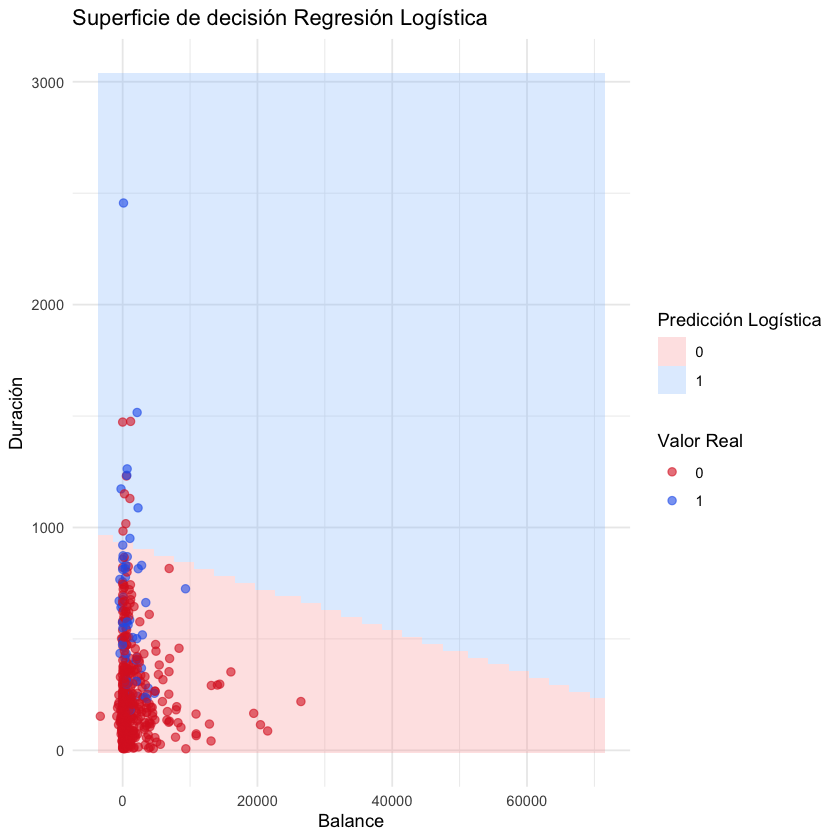

In [24]:
# Ajustar modelo logístico simplificado
modelo_log_simple <- glm(y ~ balance + duration, 
                        data = train, 
                        family = "binomial")

# Crear grid
grid <- expand.grid(
    balance = seq(min(bank$balance), max(bank$balance), length.out = 100),
    duration = seq(min(bank$duration), max(bank$duration), length.out = 100)
)

# Obtener predicciones
grid_pred <- predict(modelo_log_simple, newdata = grid, type = "response")
grid_class <- ifelse(grid_pred > 0.5, 1, 0)

# Visualizar
ggplot() +
    geom_tile(data = cbind(grid, pred = grid_class),
              aes(x = balance, y = duration, fill = factor(pred)), 
              alpha = 0.3) +
    geom_point(data = test, 
               aes(x = balance, y = duration, color = factor(y)),
               size = 2, alpha = 0.6) +
    scale_fill_manual(values = c("#FCA5A5", "#93C5FD"), 
                     name = "Predicción Logística") +
    scale_color_manual(values = c("#DC2626", "#2563EB"), 
                      name = "Valor Real") +
    labs(title = "Superficie de decisión Regresión Logística",
         x = "Balance",
         y = "Duración") +
    theme_minimal()

## LDA 

In [9]:
modelo_lda <- lda(y ~ ., data = train)
pred_lda <- predict(modelo_lda, newdata = test)
pred_lda_class <- pred_lda$class

In [43]:
conf_lda <- table(Real = test$y, Predicho = pred_lda_class)
cat("\nMatriz de confusión - LDA:\n")
print(conf_lda)
cat("\nPrecisión:", sum(diag(conf_lda))/sum(conf_lda))


Matriz de confusión - LDA:
    Predicho
Real   0   1
   0 443  15
   1  34  29

Precisión: 0.9059501

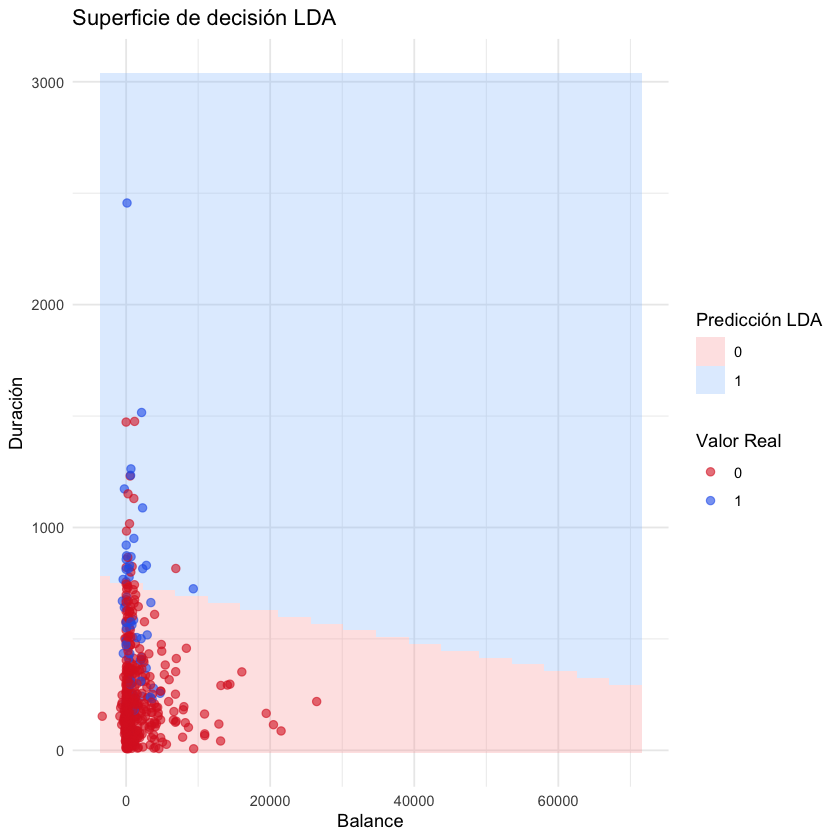

In [23]:
# Ajustar modelo LDA simplificado
modelo_lda_simple <- lda(y ~ balance + duration, data = train)

# Crear grid para visualización
grid <- expand.grid(
    balance = seq(min(bank$balance), max(bank$balance), length.out = 100),
    duration = seq(min(bank$duration), max(bank$duration), length.out = 100)
)

# Obtener predicciones
grid_pred <- predict(modelo_lda_simple, newdata = grid)$class

# Visualización
ggplot() +
    geom_tile(data = cbind(grid, pred = as.numeric(as.character(grid_pred))),
              aes(x = balance, y = duration, fill = factor(pred)), alpha = 0.3) +
    geom_point(data = test, aes(x = balance, y = duration, color = factor(y)), 
               size = 2, alpha = 0.6) +
    scale_fill_manual(values = c("#FCA5A5", "#93C5FD"), name = "Predicción LDA") +
    scale_color_manual(values = c("#DC2626", "#2563EB"), name = "Valor Real") +
    labs(title = "Superficie de decisión LDA",
         x = "Balance",
         y = "Duración") +
    theme_minimal()

## QDA

In [12]:
modelo_qda <- qda(y ~ ., data = train)
pred_qda <- predict(modelo_qda, newdata = test)
pred_qda_class <- pred_qda$class

In [13]:
conf_qda <- table(Real = test$y, Predicho = pred_qda_class)
cat("\nMatriz de confusión - QDA:\n")
print(conf_qda)
cat("\nPrecisión:", sum(diag(conf_qda))/sum(conf_qda))


Matriz de confusión - QDA:
    Predicho
Real   0   1
   0 423  35
   1  36  27

Precisión: 0.8637236

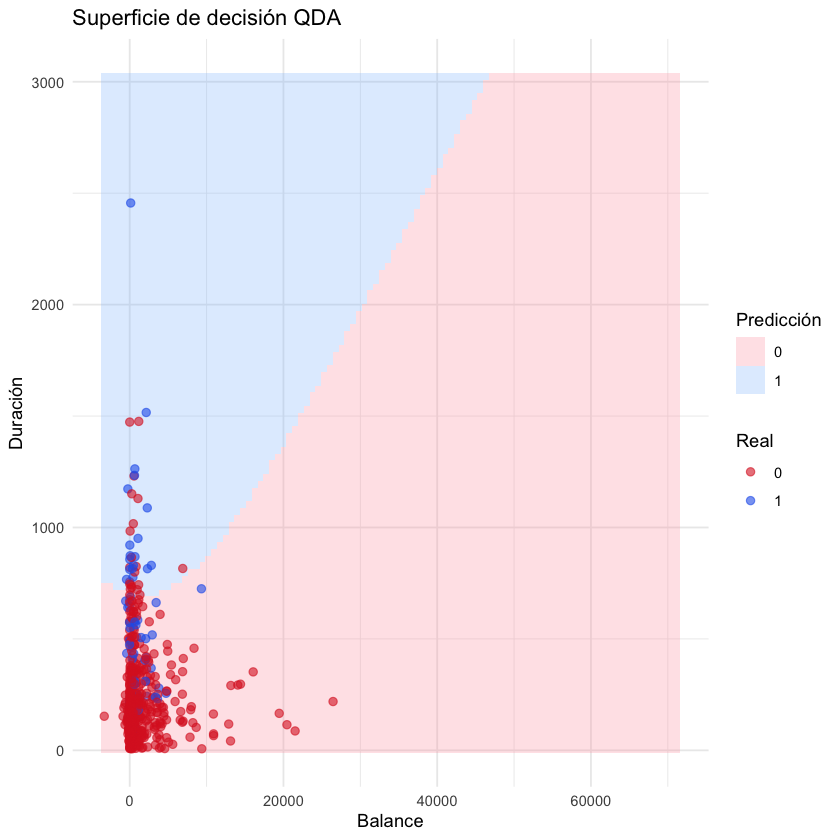

In [22]:
# Preparar datos
bank$y <- as.factor(bank$y)
train$y <- as.factor(train$y)
test$y <- as.factor(test$y)

# Ajustar QDA con solo 2 variables
modelo_qda_simple <- qda(y ~ balance + duration, data = train)

# Crear grid
grid <- expand.grid(
    balance = seq(min(bank$balance), max(bank$balance), length.out = 100),
    duration = seq(min(bank$duration), max(bank$duration), length.out = 100)
)

# Predicciones
grid_pred <- predict(modelo_qda_simple, newdata = grid)$class

# Visualización
ggplot() +
    geom_tile(data = cbind(grid, pred = as.numeric(as.character(grid_pred))),
              aes(x = balance, y = duration, fill = factor(pred)), alpha = 0.3) +
    geom_point(data = test, aes(x = balance, y = duration, color = factor(y)), 
               size = 2, alpha = 0.6) +
    scale_fill_manual(values = c("#FDA4AF", "#93C5FD"), name = "Predicción") +
    scale_color_manual(values = c("#DC2626", "#2563EB"), name = "Real") +
    labs(title = "Superficie de decisión QDA",
         x = "Balance",
         y = "Duración") +
    theme_minimal()

## Otros datos

`geom_smooth()` using formula = 'y ~ x'


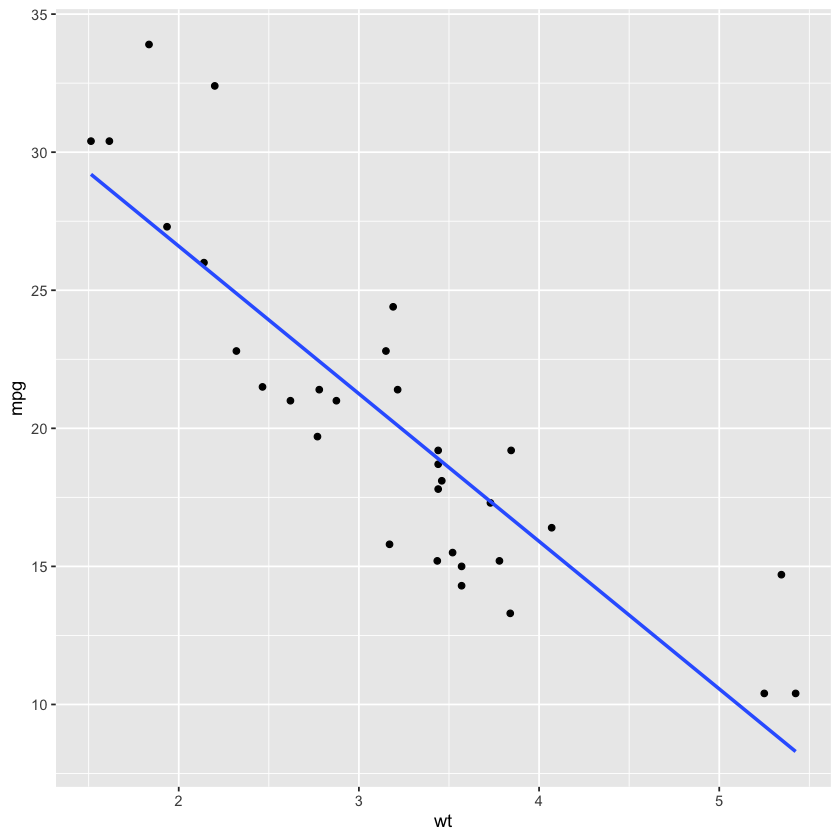

In [34]:
library(ISLR)
data("mtcars")
# Visualizamos los datos para entender la relación entre mpg (millas por galón) y wt (peso del coche)
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + geom_smooth(method="lm", se=FALSE)

# luego quitar nans y variables raras y hacer lasso para hacer seleccion de variables

In [50]:
mtcart_2 <- na.omit(mtcars)
mtcart_reduce <-mtcart_2[, c("mpg","drat", "wt", "vs")]
library(MASS)
lda.fit <- lda(mtcart_reduce$vs ~ ., data = mtcart_reduce)

lda.pred2 <- predict(lda.fit)
mtcart_reduce$vs
# Comparamos con la realidad
table(lda.pred2$class, mtcart_reduce$vs)
# Vemos que el porcentaje mal clasificado clasificados es
mean(lda.pred2$class!= mtcart_reduce$vs)
# clasifica bien la clase 0 17/18
# clasifica mal la clase 1 5/14


qda.fit <- qda(mtcart_reduce$vs ~ ., data = mtcart_reduce)

# Predicci�n para los valores observados
qda.pred <- predict(qda.fit)

# Comparamos con la realidad
table(qda.pred$class, mtcart_reduce$vs)
# clasifica bien la clase 0 17/18
# clasifica mal la clase 1 4/14

# En este caso en an�lisis predictivo es mejor
# tasa mal clasificada
mean(qda.pred$class!= mtcart_reduce$vs)

[1] 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1

   
     0  1
  0 17  5
  1  1  9

[1] 0.1875

   
     0  1
  0 17  4
  1  1 10

[1] 0.15625

In [51]:
mtcart_reduce_2 <-mtcart_2[, c("mpg","disp", "hp", "vs")]
lda.fit <- lda(mtcart_reduce_2$vs ~ ., data = mtcart_reduce_2)

# se calcula con proporciones muestrales
lda.fit$prior
table(mtcart_reduce_2$vs)/length(mtcart_reduce_2$vs)

# Dentro de cada subgrupo se ajusta una normal de medias 
lda.fit$means

# Predicci�n en observaciones originales
lda.pred2 <- predict(lda.fit)

# Comparamos con la realidad
table(lda.pred2$class, mtcart_reduce_2$vs)
# Vemos que el porcentaje de bien clasificados es
mean(lda.pred2$class== mtcart_reduce_2$vs)


# En este caso tiene un mejor comportamiento usar qsec y drat ya que 
# en laso comprobamos que se explicaban menos la variable mpg
mtcart_reduce_3 <-mtcart_2[, c("mpg","qsec", "drat", "vs")]
lda.fit <- lda(mtcart_reduce_3$vs ~ ., data = mtcart_reduce_3)

# se calcula con proporciones muestrales
lda.fit$prior
table(mtcart_reduce_3$vs)/length(mtcart_reduce_3$vs)

# Dentro de cada subgrupo se ajusta una normal de medias 
lda.fit$means

# Predicci�n en observaciones originales
lda.pred2 <- predict(lda.fit)

# Comparamos con la realidad
table(lda.pred2$class, mtcart_reduce_3$vs)
# Vemos que el porcentaje de bien clasificados es
mean(lda.pred2$class== mtcart_reduce_3$vs)

0      1 
0.5625 0.4375


     0      1 
0.5625 0.4375 

,mpg,disp,hp
0,16.61667,307.1500,189.72222
1,24.55714,132.4571,91.35714


   
     0  1
  0 15  0
  1  3 14

[1] 0.90625

0      1 
0.5625 0.4375


     0      1 
0.5625 0.4375 

,mpg,qsec,drat
0,16.61667,16.69389,3.392222
1,24.55714,19.33357,3.859286


   
     0  1
  0 17  0
  1  1 14

[1] 0.96875

# Descenso de gradiente

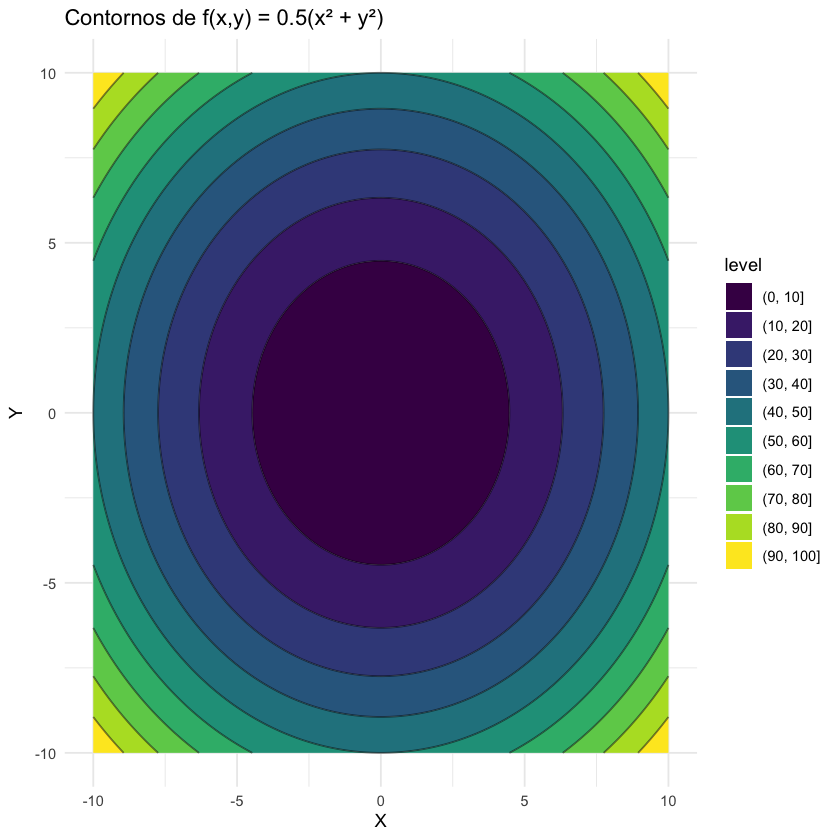

In [67]:
# funcion objetivo
f <- function(x, y) {
    return(0.5 * (x^2 + y^2))
}

# gradiente de la función objetivo
gradiente <- function(punto) {
    return(c(punto[1], punto[2]))
}


x_seq <- seq(-10, 10, length.out = 100)
y_seq <- seq(-10, 10, length.out = 100)
df <- expand.grid(x = x_seq, y = y_seq)
df$z <- 0.5 * (df$x^2 + df$y^2)

library(ggplot2)
ggplot(df, aes(x = x, y = y, z = z)) + geom_contour_filled() + geom_contour(color = "black", alpha = 0.5) + 
scale_fill_viridis_d() + theme_minimal() + labs(title = "Contornos de f(x,y) = 0.5(x² + y²)", x = "X", y = "Y")

In [68]:
# exact line search 
exact_step <- function(punto, dir, gamma = 1) {
    x <- punto[1]
    y <- punto[2]
    return((gamma^2*y^2 + x^2)/(gamma^3*y^2 + x^2))
}

# algoritmo de descenso de gradiente
descenso_gradiente <- function(punto_inicial, alpha = 0.1, tolerancia = 1e-5, max_iter = 1000, exact_search = FALSE) {
    punto_actual <- punto_inicial
    trayectoria <- matrix(punto_actual, ncol = 2)
    
    for(i in 1:max_iter) {
        dir <- -gradiente(punto_actual) # la dirección es el gradiente negativo
        
        # criterio de parada
        if(sum(dir^2) < tolerancia) {
            break
        }
        
        # paso (exact search o paso fijo)
        if(exact_search) {
            paso <- exact_step(punto_actual, dir)
        } else {
            paso <- alpha
        }
        
        punto_actual <- punto_actual + paso * dir
        trayectoria <- rbind(trayectoria, punto_actual)
    }
    
    return(list(solucion = punto_actual, trayectoria = trayectoria, iteraciones = i, valor_final = f(punto_actual[1], punto_actual[2])))
}

Punto final: 0.002620041 0.001310021 
Valor función: 4.290384e-06 
Iteraciones: 64 


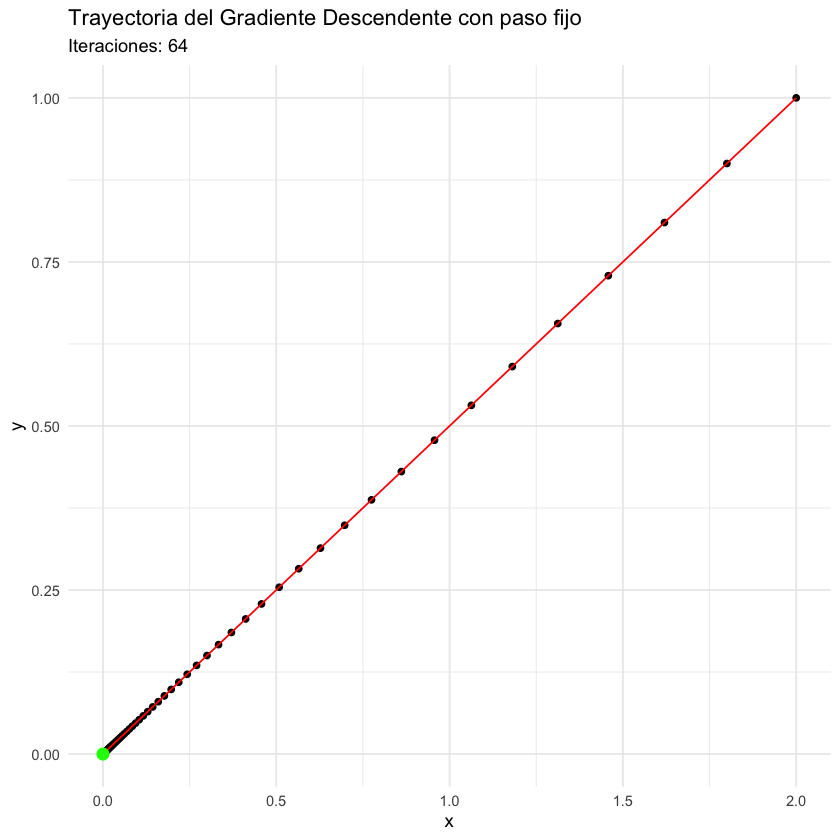

Punto final: 0 0 
Valor función: 0 
Iteraciones: 2 


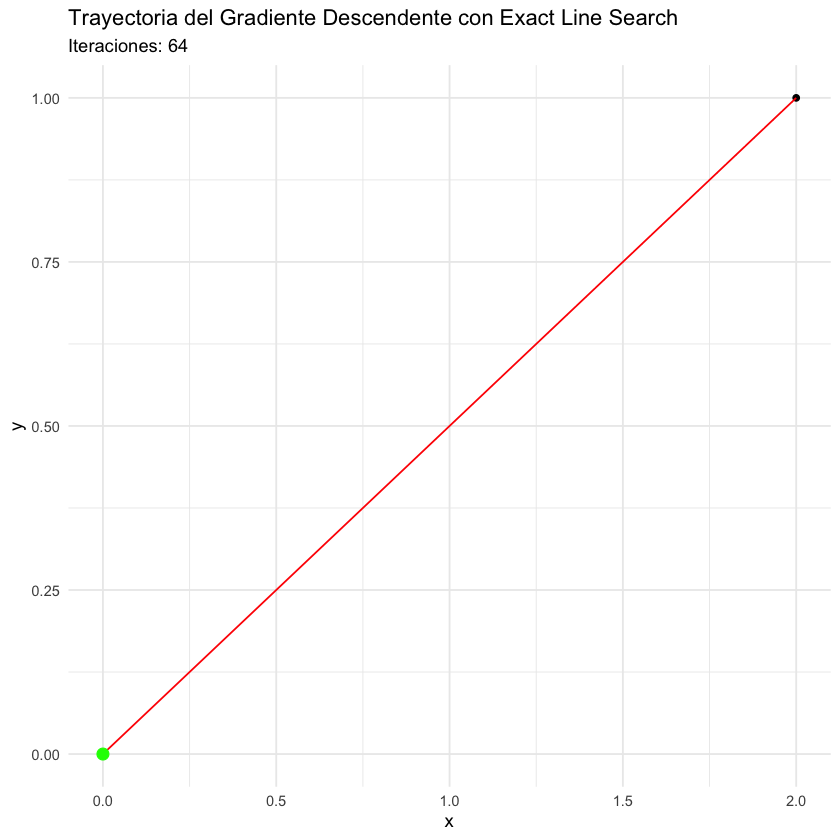

In [71]:
punto_inicial <- c(2, 1)
resultado <- descenso_gradiente(punto_inicial)
resultado_esl <- descenso_gradiente(punto_inicial,exact_search = TRUE)


library(ggplot2)
df_trayectoria <- data.frame(x = resultado$trayectoria[,1], y = resultado$trayectoria[,2])
df_trayectoria_esl <- data.frame(x = resultado_esl$trayectoria[,1], y = resultado_esl$trayectoria[,2])

ggplot(df_trayectoria, aes(x = x, y = y)) +
    geom_point() +
    geom_path(color = "red") +
    geom_point(data = data.frame(x = 0, y = 0), 
               color = "green", size = 3) +
    labs(title = "Trayectoria del Gradiente Descendente con paso fijo",
         subtitle = paste("Iteraciones:", resultado$iteraciones)) +
    theme_minimal()

# Mostrar resultados
cat("Punto final:", resultado$solucion, "\n")
cat("Valor función:", resultado$valor_final, "\n")
cat("Iteraciones:", resultado$iteraciones, "\n")


ggplot(df_trayectoria_esl, aes(x = x, y = y)) +
    geom_point() +
    geom_path(color = "red") +
    geom_point(data = data.frame(x = 0, y = 0), 
               color = "green", size = 3) +
    labs(title = "Trayectoria del Gradiente Descendente con Exact Line Search",
         subtitle = paste("Iteraciones:", resultado$iteraciones)) +
    theme_minimal()

# Mostrar resultados
cat("Punto final:", resultado_esl$solucion, "\n")
cat("Valor función:", resultado_esl$valor_final, "\n")
cat("Iteraciones:", resultado_esl$iteraciones, "\n")